# **THE SPARKS FOUNDATION INTERNSHIP**

**Task:-1**
Prediction using Supervised Machine Learning

Predict the percentage of an student based on the no. of study hours.

What will be predicted score if a student studies for 9.25 hrs/ day?

In this task we will predict the percentage of marks scored by student based on number of hours he studied


**By**   **Ammanabrolu Lalitha**

---




In [ ]:
# Importing all the required libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Loading the dataset
df = pd.read_csv("http://bit.ly/w-data")
print("Data imported successfully")

Data imported successfully


In [ ]:
#prints information about a DataFrame including the index dtype and columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
#check missing values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [ ]:
# First 10 rows of dataset
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
# Last 5 rows of dataset
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


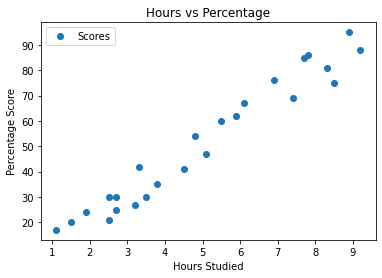

In [ ]:
#Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

we see that there is a positive linear relation between the number of hours studied and percentage of score

 **Preparing the data**

In [ ]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values


**Spliting this data into training and test**

In [ ]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


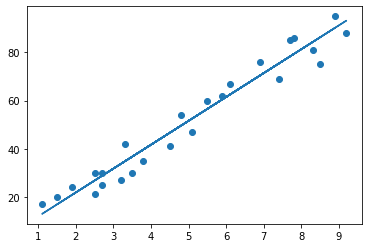

In [ ]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

From the above  plot we can see that  variables are moving in the same direction which means they are  positively correlated with each other

In [ ]:
#Making Predictions
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) 

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [ ]:
# Predicting the scores
pred_y = regressor.predict(X_test)
predict = pd.DataFrame({'Hours': [i[0] for i in X_test], 'Predicted Marks': [k for k in pred_y]})
predict

,Hours,Predicted Marks
0,1.5,16.884145
1,3.2,33.732261
2,7.4,75.357018
3,2.5,26.794801
4,5.9,60.491033


In [ ]:
# Comparing Actual vs Predicted
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df1

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


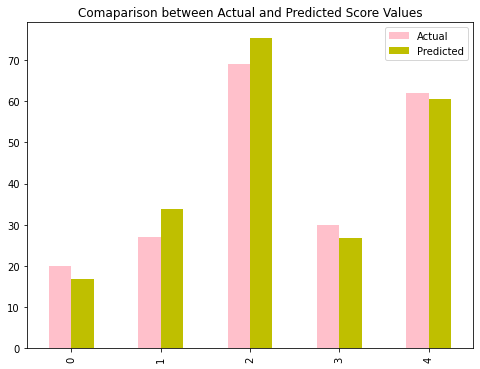

In [ ]:
df1.plot(kind='bar',figsize=(8,6), color=["pink", "y"], title= "Comaparison between Actual and Predicted Score Values")

**Model Evaluation**

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

# To find Mean Absolute Error(mse)
mse = (mean_absolute_error(y_test, y_pred))
print("MAE:",mse)

# To find Root Mean Squared Error(rmse)
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print("RMSE:",rmse)

# To find coefficient of determination
r2 =  r2_score(y_test, y_pred)
print("R-Square:",r2)

MAE: 4.183859899002982
RMSE: 4.647447612100373
R-Square: 0.9454906892105354


**The accuracy of the model is 94.55%. The mean absolute error is 4.18%.**



**What will be predicted score if a student studies for 9.25 hrs/ day?**

In [ ]:
print('Score of student who studied for 9.25 hours a dat', regressor.predict([[9.25]]))


Score of student who studied for 9.25 hours a dat [93.69173249]
